<a href="https://www.kaggle.com/code/kokeyehya/brain-mri-classify?scriptVersionId=118485581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import cv2

import numpy as np
import pandas as pd
from glob import glob

import PIL.Image as Image
import matplotlib.pylab as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#from keras.preprocessing import image
#from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [2]:
import cv2
import glob
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns


import matplotlib.pyplot as plt

In [3]:
path = "/kaggle/input/brain-tumor"
classes = ['1', '2', '3']

train_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(path + "/" + folder + "/*")
  train_size.append(len(train))

print(train_size)

[708, 1426, 930]


In [4]:
datagen = ImageDataGenerator( validation_split=0.2)
train_generator = datagen.flow_from_directory(path, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
valid_generator = datagen.flow_from_directory(path, # same directory as training data
    target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation') # set as validation data

Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [5]:
from operator import length_hint
print('num of samples:',train_generator.samples)
print('num of classes:',len(train_generator.class_indices))
print('num sample per class:',int(train_generator.samples/len(train_generator.class_indices)))

num of samples: 2452
num of classes: 3
num sample per class: 817


In [6]:
batch_size = 50

In [7]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_valid = valid_generator.n//valid_generator.batch_size

# Model

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np




In [9]:

IMAGE_SIZE = [224, 224]
base_modell = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

from keras import Model

flatten = Flatten()(base_modell.output)

predication = Dense(3, activation='softmax')(flatten)
model_tll = Model(inputs=base_modell.input, outputs=predication)

model_tll.summary()

2023-02-07 15:34:05.561151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 15:34:05.683722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 15:34:05.684618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 15:34:05.686331: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [10]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [11]:
import tensorflow as tf

model_tll.compile(optimizer=opt, loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

#when make trainable by false give us higher accuracy

In [12]:
base_modell.trainable = False

In [13]:
historyy=model_tll.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=10,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

2023-02-07 15:34:11.046203: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-02-07 15:34:17.310681: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


76/76 [==============================] - 70s 758ms/step - loss: 1.9696 - categorical_accuracy: 0.7591 - val_loss: 165304208.0000 - val_categorical_accuracy: 0.4655
Epoch 2/10
76/76 [==============================] - 38s 504ms/step - loss: 2.6710 - categorical_accuracy: 0.7368 - val_loss: 930108.7500 - val_categorical_accuracy: 0.3026
Epoch 3/10
76/76 [==============================] - 38s 495ms/step - loss: 0.9594 - categorical_accuracy: 0.8058 - val_loss: 90.8968 - val_categorical_accuracy: 0.4243
Epoch 4/10
76/76 [==============================] - 38s 500ms/step - loss: 2.1332 - categorical_accuracy: 0.7607 - val_loss: 578258.8125 - val_categorical_accuracy: 0.3059
Epoch 5/10
76/76 [==============================] - 38s 495ms/step - loss: 0.7054 - categorical_accuracy: 0.8050 - val_loss: 15676.7793 - val_categorical_accuracy: 0.4309
Epoch 6/10
76/76 [==============================] - 38s 501ms/step - loss: 1.5141 - categorical_accuracy: 0.7789 - val_loss: 22078.4570 - val_categorical

In [14]:
y_true = valid_generator.classes

In [15]:
y_pred_prob = model_tll.predict(valid_generator)

              precision    recall  f1-score   support

           1       0.23      0.19      0.21       141
           2       0.47      0.59      0.52       285
           3       0.26      0.19      0.22       186

    accuracy                           0.38       612
   macro avg       0.32      0.32      0.32       612
weighted avg       0.35      0.38      0.36       612



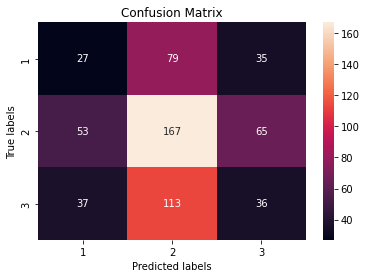

In [16]:
y_pred_prob = model_tll.predict(valid_generator)
y_pred = tf.argmax(y_pred_prob, axis=-1)
y_pred = y_pred.numpy()
y_pred
print(classification_report(y_true, y_pred, target_names = classes))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [17]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [18]:
y_pred = y_pred.numpy()
y_pred

array([1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0,

In [19]:
print(classification_report(y_true, y_pred, target_names = classes))

              precision    recall  f1-score   support

           1       0.23      0.19      0.21       141
           2       0.47      0.59      0.52       285
           3       0.26      0.19      0.22       186

    accuracy                           0.38       612
   macro avg       0.32      0.32      0.32       612
weighted avg       0.35      0.38      0.36       612



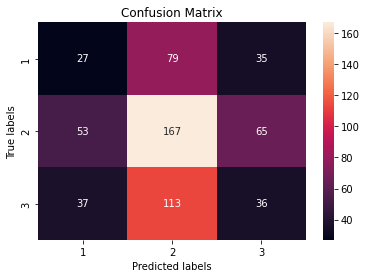

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [21]:
cm

array([[ 27,  79,  35],
       [ 53, 167,  65],
       [ 37, 113,  36]])

,,,,,,,,,,,,,,,,,,,,,

In [22]:
%matplotlib inline

def plot_training_history(history):
  plt.style.use('ggplot')
  fig = plt.figure(figsize=(16,6))
  
  plt.subplot(1,2,1)
  plt.plot(historyy.history['val_categorical_accuracy'], label='val accuracy')
  plt.plot(historyy.history['categorical_accuracy'], label='train accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['Validation Accuracy','Training Accuracy'], loc='lower right')
  
  plt.subplot(1,2,2)
  plt.plot(historyy.history['val_loss'], label='val loss')
  plt.plot(historyy.history['loss'], label='train loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(['Validation Loss','Training Loss'], loc='upper right')
  plt.show()
  plot_training_history(historyy)

In [23]:
Y_predd=model_tll.predict(valid_generator, np.ceil(len(valid_generator)))

In [24]:
Y_predd

array([[1.0429787e-03, 9.9859899e-01, 3.5811815e-04],
       [9.9304354e-01, 6.9532953e-03, 3.2057146e-06],
       [1.4511040e-10, 1.0000000e+00, 1.3986527e-09],
       ...,
       [7.0619601e-04, 5.6196779e-01, 4.3732601e-01],
       [7.4737442e-01, 2.5262454e-01, 1.0754197e-06],
       [8.9371210e-01, 9.3137078e-02, 1.3150818e-02]], dtype=float32)

Cnn

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image  import  ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras

In [26]:
modell=tf.keras.models.Sequential(
[#16 filter ,inputshapesize200*200 RGB *3
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224, 224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #32 filter
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #flatten
    tf.keras.layers.Flatten(),
    #activation and outputlayes
    tf.keras.layers.Dense(512,activation='relu'),
    #2clases need on nerron 
    tf.keras.layers.Dense(3,activation='softmax')
    
]
)

In [27]:
modell.compile(optimizer=opt, loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [28]:
histor=modell.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=10,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/10
76/76 [==============================] - 36s 458ms/step - loss: 61.7379 - categorical_accuracy: 0.4372 - val_loss: 1.0584 - val_categorical_accuracy: 0.4638
Epoch 2/10
76/76 [==============================] - 35s 458ms/step - loss: 1.0565 - categorical_accuracy: 0.4665 - val_loss: 1.0550 - val_categorical_accuracy: 0.4671
Epoch 3/10
76/76 [==============================] - 34s 451ms/step - loss: 1.0561 - categorical_accuracy: 0.4665 - val_loss: 1.0543 - val_categorical_accuracy: 0.4688
Epoch 4/10
76/76 [==============================] - 35s 455ms/step - loss: 1.0567 - categorical_accuracy: 0.4653 - val_loss: 1.0569 - val_categorical_accuracy: 0.4638
Epoch 5/10
76/76 [==============================] - 34s 452ms/step - loss: 1.0572 - categorical_accuracy: 0.4649 - val_loss: 1.0566 - val_categorical_accuracy: 0.4655
Epoch 6/10
76/76 [==============================] - 34s 449ms/step - loss: 1.0569 - categorical_accuracy: 0.4645 - val_loss: 1.0573 - val_categorical_accuracy: 0.46

In [29]:
y_pred_prob2 = modell.predict(valid_generator)
y_pred2 = tf.argmax(y_pred_prob2, axis=-1)
y_pred2 = y_pred2.numpy()
y_pred2
print(classification_report(y_true, y_pred2, target_names = classes))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       141
           2       0.47      1.00      0.64       285
           3       0.00      0.00      0.00       186

    accuracy                           0.47       612
   macro avg       0.16      0.33      0.21       612
weighted avg       0.22      0.47      0.30       612



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


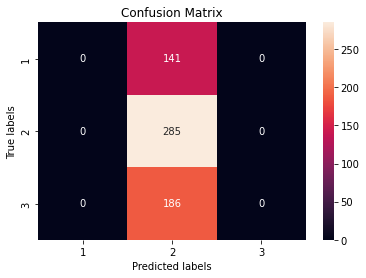

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred2)
cm
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [31]:
%matplotlib inline

def plot_training_history(history):
  plt.style.use('ggplot')
  fig = plt.figure(figsize=(16,6))
  
  plt.subplot(1,2,1)
  plt.plot(histor.history['val_categorical_accuracy'], label='val accuracy')
  plt.plot(histor.history['categorical_accuracy'], label='train accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['Validation Accuracy','Training Accuracy'], loc='lower right')
  
  plt.subplot(1,2,2)
  plt.plot(histor.history['val_loss'], label='val loss')
  plt.plot(histor.history['loss'], label='train loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(['Validation Loss','Training Loss'], loc='upper right')
  plt.show()
  plot_training_history(histor)

.............................................................

Ensamble inspection and vgg16

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model1 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions1 = Dense(3, activation='softmax')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

87924736/87910968 [==============================] - 1s 0us/step


In [33]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model2 = VGG16(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions2 = Dense(3, activation='softmax')(x)
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)

58900480/58889256 [==============================] - 0s 0us/step


In [34]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

ensamble of 1 and 2 model

In [35]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
"""model_1 = load_model('/content/drive/MyDrive/domiatresearch/mo/model1.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/domiatresearch/mo/model2.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')"""
models = [model1, model2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer=opt, loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [36]:
history=ensemble_model.fit(train_generator,
             steps_per_epoch=step_size_train,
             epochs=10,
             validation_data=valid_generator,
             validation_steps=step_size_valid)

Epoch 1/10
76/76 [==============================] - 54s 573ms/step - loss: 1.2800 - categorical_accuracy: 0.4624 - val_loss: 5.3612 - val_categorical_accuracy: 0.2319
Epoch 2/10
76/76 [==============================] - 40s 520ms/step - loss: 1.0582 - categorical_accuracy: 0.4640 - val_loss: 5.3359 - val_categorical_accuracy: 0.2319
Epoch 3/10
76/76 [==============================] - 40s 521ms/step - loss: 0.9763 - categorical_accuracy: 0.4620 - val_loss: 1.9884 - val_categorical_accuracy: 0.4556
Epoch 4/10
76/76 [==============================] - 40s 523ms/step - loss: 0.8913 - categorical_accuracy: 0.4450 - val_loss: 2.2147 - val_categorical_accuracy: 0.2500
Epoch 5/10
76/76 [==============================] - 40s 528ms/step - loss: 0.8534 - categorical_accuracy: 0.4616 - val_loss: 1.0255 - val_categorical_accuracy: 0.4638
Epoch 6/10
76/76 [==============================] - 41s 542ms/step - loss: 0.8261 - categorical_accuracy: 0.4508 - val_loss: 1.2818 - val_categorical_accuracy: 0.450

In [37]:
y_pred_prob3 = ensemble_model.predict(valid_generator)

In [38]:
y_pred_prob3 = ensemble_model.predict(valid_generator)
y_pred3 = tf.argmax(y_pred_prob3, axis=-1)
y_pred3 = y_pred3.numpy()
y_pred3
print(classification_report(y_true, y_pred3, target_names = classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       141
           2       0.47      1.00      0.64       285
           3       0.00      0.00      0.00       186

    accuracy                           0.47       612
   macro avg       0.16      0.33      0.21       612
weighted avg       0.22      0.47      0.30       612



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


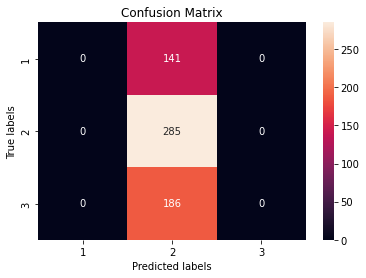

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred3)
cm
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [40]:
%matplotlib inline

def plot_training_history(history):
  plt.style.use('ggplot')
  fig = plt.figure(figsize=(16,6))
  
  plt.subplot(1,2,1)
  plt.plot(history.history['val_categorical_accuracy'], label='val accuracy')
  plt.plot(history.history['categorical_accuracy'], label='train accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.legend(['Validation Accuracy','Training Accuracy'], loc='lower right')
  
  plt.subplot(1,2,2)
  plt.plot(history.history['val_loss'], label='val loss')
  plt.plot(history.history['loss'], label='train loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(['Validation Loss','Training Loss'], loc='upper right')
  plt.show()
  plot_training_history(history)